# Image Processing Exercises

# GPU in colab
First, you'll need to enable GPUs for the notebook:
*   Navigate to Edit→Notebook Settings
*   select GPU from the Hardware Accelerator drop-down




In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2022-05-04 11:19:31.661581: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-04 11:19:31.723546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 11:19:31.777662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 11:19:31.777796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [ ]:
import numpy as np
from google.colab import drive, files
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Exercise 1

a) Load and preprocess CIFAR10 Dataset.


b) Set up the neural network model without the MAGIC LAYERS.


c) Set up the callbacks


d) Compile the model and fit the data to the model


e) Plot the accuracy and loss curves, also view it on tensorboard. 

f)  Load the best saved model


g) Evaluate the model on the test data and compare your scores with the GUIDE notebook. 

# Exercise 2

a) Mount your google drive:



In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


b) 
Data Source FER.zip: https://drive.google.com/file/d/1CC8sSO8AJLmx2dgsGaYBVCrM8lzrtUDG/view?usp=sharing

Upload the FER.zip file to your COLAB files. 




Make sure that the upload has finished, check the circular progress bar. 
c). Unzip the files to your google drive location by running the following cells:

In [ ]:
!mkdir  "/content/drive/My Drive/Colab Notebooks/FER" 

In [ ]:
# need to run it only once!!!!!!
!unzip -FF "/content/FER.zip" -d "/content/drive/My Drive/Colab Notebooks/FER" # need to run it only once!!!!!!

c) Set up the dataset from directory by running the following cells:

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255, # rescaling 
    validation_split=0.2# float fraction of images for validation
    )

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = (48, 48)
train_dir = "/content/drive/My Drive/Colab Notebooks/FER/train"
test_dir = "/content/drive/My Drive/Colab Notebooks/FER/test"

In [ ]:
train_dataset = datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=0,
    subset="training")

Found 11961 images belonging to 3 classes.


In [ ]:
val_dataset = datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=0,
    subset="validation")

Found 2990 images belonging to 3 classes.


In [ ]:
test_dataset = datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=1,
)

Found 3718 images belonging to 3 classes.


In [ ]:
str_labels = ["happy", "neutral", "sad"] # labels of the images

d) Visualise the images by running the following cell

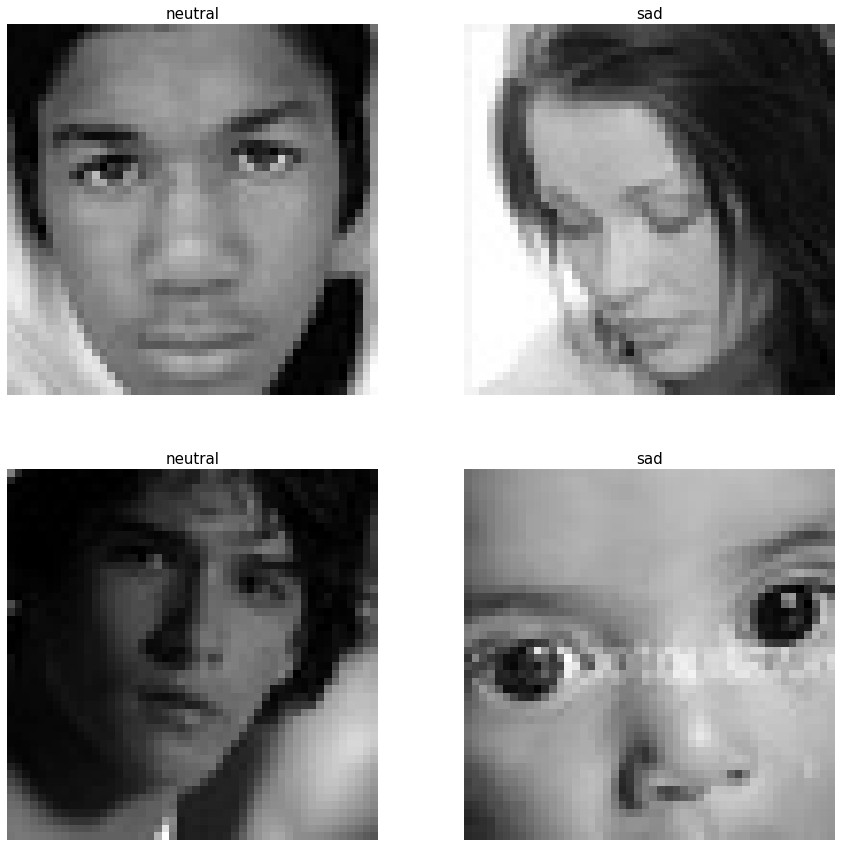

In [ ]:
batch = train_dataset.next()
num_of_imgs = 4
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
k = 0
#for k, (image_collect, label) in enumerate(zip(batch[0], batch[1])):
for i in range(nrows):
    for j in range(ncols):
        image = batch[0][k]
        label = batch[1][k]
        axes[i][j].imshow(image[:,:,0], cmap="gray")
        axes[i][j].set_title(str_labels[np.argmax(label)], fontsize=15)
        axes[i][j].axis("off")
        if k == num_of_imgs - 1:
            break
        k += 1
train_dataset.reset() # after using next we need to reset the generator, otherwise we would loose 1st batch

3. Create a neural network model (with MAGIC LAYERS) and fit it to the data. 


4. Make predictions on the test data set and display your predictions versus the photos.  